In [1]:
import pandas as pd
import numpy as np


#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal", date_parser=lambda x: pd.to_datetime(x, format="%d/%m/%Y"))

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-11-26,19.6,27.4,23.6,82.0,3.7,4.3,2.0,180.0,1.0,C
2022-11-27,19.6,29.0,23.1,88.0,38.5,2.5,5.0,60.0,1.0,C
2022-11-28,19.8,28.8,23.0,86.0,30.9,3.9,4.0,180.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Dropping unused data - null data

In [2]:
df = df.dropna()
df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-11-26,19.6,27.4,23.6,82.0,3.7,4.3,2.0,180.0,1.0,C
2022-11-27,19.6,29.0,23.1,88.0,38.5,2.5,5.0,60.0,1.0,C
2022-11-28,19.8,28.8,23.0,86.0,30.9,3.9,4.0,180.0,1.0,C


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [3]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,20.262149,28.942594,24.133398,79.693127,342.616457,5.782478,4.490803,128.896418,1.796709
std,1.259380,1.169760,0.912933,6.475185,1693.546133,2.751390,1.282017,63.529444,0.744039
min,14.200000,24.500000,20.100000,38.000000,0.000000,0.000000,2.000000,10.000000,0.000000
25%,19.800000,28.300000,23.600000,76.000000,0.000000,3.800000,4.000000,70.000000,1.000000
50%,20.400000,29.000000,24.200000,80.000000,0.600000,6.000000,4.000000,130.000000,2.000000
75%,21.100000,29.800000,24.700000,84.000000,9.900000,8.000000,5.000000,170.000000,2.000000
max,23.400000,32.000000,26.900000,96.000000,8888.000000,11.000000,10.000000,360.000000,5.000000


In [4]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_16184\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_16184\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-11-26,19.6,27.4,23.6,82.0,3.7,4.3,2.0,180.0,1.0,C
2022-11-27,19.6,29.0,23.1,88.0,38.5,2.5,5.0,60.0,1.0,C
2022-11-28,19.8,28.8,23.0,86.0,30.9,3.9,4.0,180.0,1.0,C


In [5]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,20.242555,28.939638,24.134306,79.623742,7.334809,5.797082,4.486922,128.219316,1.799799
std,1.267373,1.171093,0.918019,6.528524,14.841895,2.757551,1.282122,63.300847,0.743661
min,14.200000,24.500000,20.100000,38.000000,0.000000,0.000000,2.000000,10.000000,0.000000
25%,19.800000,28.300000,23.600000,76.000000,0.000000,3.800000,4.000000,70.000000,1.000000
50%,20.400000,29.000000,24.200000,80.000000,0.400000,6.000000,4.000000,130.000000,2.000000
75%,21.100000,29.800000,24.700000,84.000000,7.000000,8.000000,5.000000,170.000000,2.000000
max,23.400000,32.000000,26.900000,96.000000,145.000000,11.000000,10.000000,360.000000,5.000000


Limit of Extreme Climate on Stasiun Klimatologi Jawa Timur

- rr/curah hujan = 145mm (28/02/2021)
- Tx/temperatur maksimum = 32°C (12/04/2020)
- Tn/temperatur minimum = 14.2°C (30/07/2020)
- Tavg/temperatur rata-rata = 26.9°C (12/11/2020)
- rh/kelembapan rata-rata = 38% (26/07/2021)
- wx/kecepatan angin maksimum = 2 knot (05/04/2020)    

In [6]:
df_mean = pd.DataFrame()
df_mean['Tn'] = df.Tn.resample('M').mean().ffill()
df_mean['Tx'] = df.Tx.resample('M').mean().ffill()
df_mean['Tavg'] = df.Tavg.resample('M').mean().ffill()
df_mean['RH_avg'] = df.RH_avg.resample('M').mean().ffill()
df_mean['RR'] = df.RR.resample('M').sum().ffill()
df_mean['ss'] = df.ss.resample('M').mean().ffill()
df_mean['ff_x'] = df.ff_x.resample('M').mean().ffill()
df_mean['ddd_x'] = df.ddd_x.resample('M').mean().ffill()
df_mean['ff_avg'] = df.ff_avg.resample('M').mean().ffill()
df_mean['ddd_car'] = df.ddd_car.resample('M').apply(lambda x: x.value_counts().index[0]).ffill()
df_mean
# df_mean.tail(5)

# print(df_mean.shape)

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-31,20.970000,29.300000,24.663333,82.133333,327.3,5.026667,3.933333,138.000000,1.433333,C
2020-02-29,20.775862,29.303448,24.220690,84.724138,502.4,4.803448,4.137931,128.965517,1.137931,C
2020-03-31,20.941935,29.590323,24.535484,82.838710,238.8,5.416129,4.064516,90.645161,1.354839,C
2020-04-30,20.803448,29.755172,24.927586,79.551724,154.2,6.500000,4.103448,87.931034,1.275862,C
2020-05-31,20.610345,29.403448,24.713793,79.965517,135.7,6.224138,4.137931,95.172414,1.551724,C
2020-06-30,18.823333,28.720000,23.716667,75.300000,3.2,7.560000,4.100000,144.000000,1.900000,S
2020-07-31,18.316667,27.880000,23.000000,75.833333,17.4,7.750000,4.600000,142.333333,2.000000,S
2020-08-31,18.418182,28.909091,23.518182,73.000000,55.3,8.109091,4.954545,129.545455,2.227273,S
2020-09-30,19.417647,29.582353,24.194118,73.352941,5.4,8.247059,5.235294,142.352941,2.411765,S


In [7]:
# labelling using sklearn on column ff_avg
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_mean['ddd_car'] = le.fit_transform(df_mean['ddd_car'])
df_mean

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-31,20.970000,29.300000,24.663333,82.133333,327.3,5.026667,3.933333,138.000000,1.433333,0
2020-02-29,20.775862,29.303448,24.220690,84.724138,502.4,4.803448,4.137931,128.965517,1.137931,0
2020-03-31,20.941935,29.590323,24.535484,82.838710,238.8,5.416129,4.064516,90.645161,1.354839,0
2020-04-30,20.803448,29.755172,24.927586,79.551724,154.2,6.500000,4.103448,87.931034,1.275862,0
2020-05-31,20.610345,29.403448,24.713793,79.965517,135.7,6.224138,4.137931,95.172414,1.551724,0
2020-06-30,18.823333,28.720000,23.716667,75.300000,3.2,7.560000,4.100000,144.000000,1.900000,1
2020-07-31,18.316667,27.880000,23.000000,75.833333,17.4,7.750000,4.600000,142.333333,2.000000,1
2020-08-31,18.418182,28.909091,23.518182,73.000000,55.3,8.109091,4.954545,129.545455,2.227273,1
2020-09-30,19.417647,29.582353,24.194118,73.352941,5.4,8.247059,5.235294,142.352941,2.411765,1


## Statistical Analysis

In [21]:
# Bartlett's test
from scipy.stats import bartlett
statistic, pvalue = bartlett(df_mean['Tn'], df_mean['Tx'], df_mean['Tavg'], df_mean['RH_avg'], df_mean['RR'], df_mean['ss'], df_mean['ff_x'], df_mean['ddd_x'], df_mean['ff_avg'], df_mean['ddd_car'])
print('statistic=%.3f, pvalue=%.3f' % (statistic, pvalue))




statistic=2206.113, pvalue=0.000


In [13]:
# KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_mean)
print('KMO Model',kmo_model)
if kmo_model < 0.5:
    print('KMO < 0.5, not suitable for factor analysis')
else:
    print('KMO > 0.5, suitable for factor analysis')

KMO Model 0.7045848429847714
KMO > 0.5, suitable for factor analysis


In [18]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')
fa.fit(df_mean)
#check Eigenvalues
ev, v = fa.get_eigenvalues()
ev



array([5.20023788, 2.38720617, 1.33336228, 0.37042508, 0.26896868,
       0.20749214, 0.11606733, 0.06735961, 0.0347265 , 0.01415433])

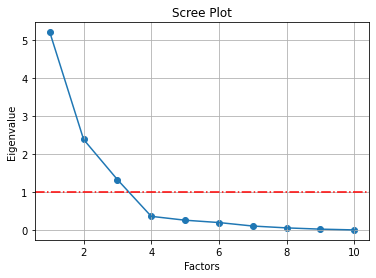

In [30]:
# Create scree plot using matplotlib
import matplotlib.pyplot as plt
plt.scatter(range(1,df_mean.shape[1]+1),ev)
plt.plot(range(1,df_mean.shape[1]+1),ev)
if ev[0] > 1:
    plt.axhline(y=1, color='r', linestyle='dashdot')

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [39]:
# Component matrix
df_componentmatrix = pd.DataFrame(fa.loadings_, index=df_mean.columns, columns=['F1', 'F2', 'F3'])
df_componentmatrix


,F1,F2,F3
Tn,0.808009,0.572206,-0.082189
Tx,-0.178638,0.884226,-0.105468
Tavg,0.252462,0.932739,-0.088262
RH_avg,0.902909,-0.029951,-0.331162
RR,0.844033,-0.053590,-0.222550
ss,-0.945299,0.090650,0.154702
ff_x,-0.311768,-0.025416,0.824593
ddd_x,0.199553,-0.473259,0.552831
ff_avg,-0.462285,-0.081318,0.886502
ddd_car,-0.567574,-0.343311,0.556451


In [40]:
# rotated component matrix
df_componentmatrix_rotated = pd.DataFrame(fa.loadings_, index=df_mean.columns, columns=['F1', 'F2', 'F3']).T
df_componentmatrix_rotated

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
F1,0.808009,-0.178638,0.252462,0.902909,0.844033,-0.945299,-0.311768,0.199553,-0.462285,-0.567574
F2,0.572206,0.884226,0.932739,-0.029951,-0.053590,0.090650,-0.025416,-0.473259,-0.081318,-0.343311
F3,-0.082189,-0.105468,-0.088262,-0.331162,-0.222550,0.154702,0.824593,0.552831,0.886502,0.556451


In [71]:

df_conclusion = []

for i in range(0, df_componentmatrix.shape[0]):
    p_or_n_array = []
    valuesny = []
    for j in range(0, df_componentmatrix.shape[1]):
        valuenya = df_componentmatrix.iloc[i,j]
        # if valuenya has minus value, convert to positive value
        p_or_n = '+'
        if valuenya < 0:
            valuenya = valuenya * -1
            p_or_n = '-'
        p_or_n_array.append(p_or_n)
        valuesny.append(valuenya)
        
    for k in range(0, len(valuesny)):
        if valuesny[k] == max(valuesny):
            df_conclusion.append([df_componentmatrix.index[i], df_componentmatrix.columns[k], p_or_n_array[k], valuesny[k], 'Strong', '*'])
        elif valuesny[k] == min(valuesny):
            df_conclusion.append([df_componentmatrix.index[i], df_componentmatrix.columns[k], p_or_n_array[k], valuesny[k], 'Weak', ''])
        else:
            df_conclusion.append([df_componentmatrix.index[i], df_componentmatrix.columns[k], p_or_n_array[k], valuesny[k], 'Moderate', ''])
        
        

df_conclusion = pd.DataFrame(df_conclusion, columns=['Variable', 'Factor', 'p_or_n', 'value', 'Conclusion', 'Mark'])
df_conclusion

,Variable,Factor,p_or_n,value,Conclusion,Mark
0,Tn,F1,+,0.808009,Strong,*
1,Tn,F2,+,0.572206,Moderate,
2,Tn,F3,-,0.082189,Weak,
3,Tx,F1,-,0.178638,Moderate,
4,Tx,F2,+,0.884226,Strong,*
5,Tx,F3,-,0.105468,Weak,
6,Tavg,F1,+,0.252462,Moderate,
7,Tavg,F2,+,0.932739,Strong,*
8,Tavg,F3,-,0.088262,Weak,
9,RH_avg,F1,+,0.902909,Strong,*


## Component Matrix Conclusion
Didapat bahwa feature yang tergolong pada Factor 1 adalah:
- Tn (0.808)
- Rh_avg (0.909)
- RR (0.844)
- SS (-0.945)
- ddd_car (-0.567)

Didapat bahwa feature yang tergolong pada Factor 2 adalah:
- Tx (0.884)
- Tavg (0.932)
  
Didapat bahwa feature yang tergolong pada Factor 3 adalah:
- ff_x (0.824)
- ddd_x (0.552)
- ff_avg (0.886)

Kesimpulan: (Masih diragukan)
Dapat disimpulkan jumlah feature yang tergolong pada Factor 1 adalah 5 feature, Factor 2 adalah 2 feature, dan Factor 3 adalah 3 feature. Jumlah feature yang tergolong pada masing-masing factor dapat digunakan sebagai isian untuk nilai n_components pada PCA.

## Split to X and y

For example, predict RR (Curah hujan)

In [75]:
X = df_mean.drop(['RR'], axis=1)
y = df_mean['RR']

y

Tanggal
2020-01-31    327.3
2020-02-29    502.4
2020-03-31    238.8
2020-04-30    154.2
2020-05-31    135.7
2020-06-30      3.2
2020-07-31     17.4
2020-08-31     55.3
2020-09-30      5.4
2020-10-31    130.8
2020-11-30    233.1
2020-12-31    319.2
2021-01-31    373.5
2021-02-28    486.4
2021-03-31    299.7
2021-04-30    123.8
2021-05-31     82.7
2021-06-30    206.3
2021-07-31     17.0
2021-08-31     36.9
2021-09-30    107.0
2021-10-31    132.8
2021-11-30    367.1
2021-12-31    212.1
2022-01-31    216.1
2022-02-28    352.5
2022-03-31    259.3
2022-04-30    354.6
2022-05-31     74.6
2022-06-30    308.2
2022-07-31     20.3
2022-08-31     43.6
2022-09-30    126.7
2022-10-31    493.1
2022-11-30    473.7
Freq: M, Name: RR, dtype: float64

## Scaled it first

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.88469636,  0.65269943,  1.00780943,  0.70304172, -0.51126637,
        -1.25793119,  0.3771053 , -1.00209234, -0.76870611],
       [ 0.65318659,  0.65901255,  0.16617382,  1.40290181, -0.6534384 ,
        -0.80014614,  0.01864971, -1.79253256, -0.76870611],
       [ 0.85122938,  1.18422287,  0.76471851,  0.89358668, -0.26321039,
        -0.96441117, -1.50176335, -1.21212898, -0.76870611],
       [ 0.68608318,  1.48603044,  1.51025562,  0.0056656 ,  0.4271276 ,
        -0.87730093, -1.60945009, -1.42345541, -0.76870611],
       [ 0.45580703,  0.84209284,  1.10375283,  0.1174445 ,  0.25142581,
        -0.80014614, -1.32213836, -0.68530112, -0.76870611],
       [-1.67520683, -0.40916629, -0.79216743, -1.14286256,  1.10226171,
        -0.88501641,  0.61516359,  0.24661867,  1.30088727],
       [-2.27940759, -1.94704078, -2.15482596, -0.99879198,  1.22327632,
         0.23372795,  0.54903629,  0.5141996 ,  1.30088727],
       [-2.15835062, -0.06297809, -1.16956334, -1.76416693,  1

## Test without PCA

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# y_test

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Score: ', reg.score(X_test, y_test))
print('What an awful Score')    

Score:  0.5855609717105581
What an awful Score


## Let's see how it Perform on Prediction (without PCA of course)

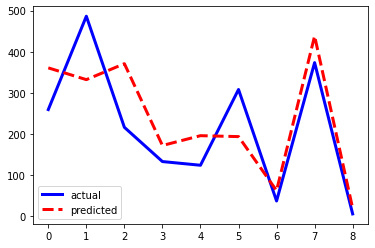

Soo many outliers that can lead to wrong prediction


In [82]:
# Plot outputs
import matplotlib.pyplot as plt

# plot y_test as line and disable index
plt.plot(y_test.values, color='blue', linewidth=3)
# plot y_pred as line and disable index
plt.plot(y_pred, color='red', linewidth=3, linestyle='dashed')
plt.legend(['actual', 'predicted'])
plt.show()
print('Soo many outliers that can lead to wrong prediction')



## Let's Test with PCA

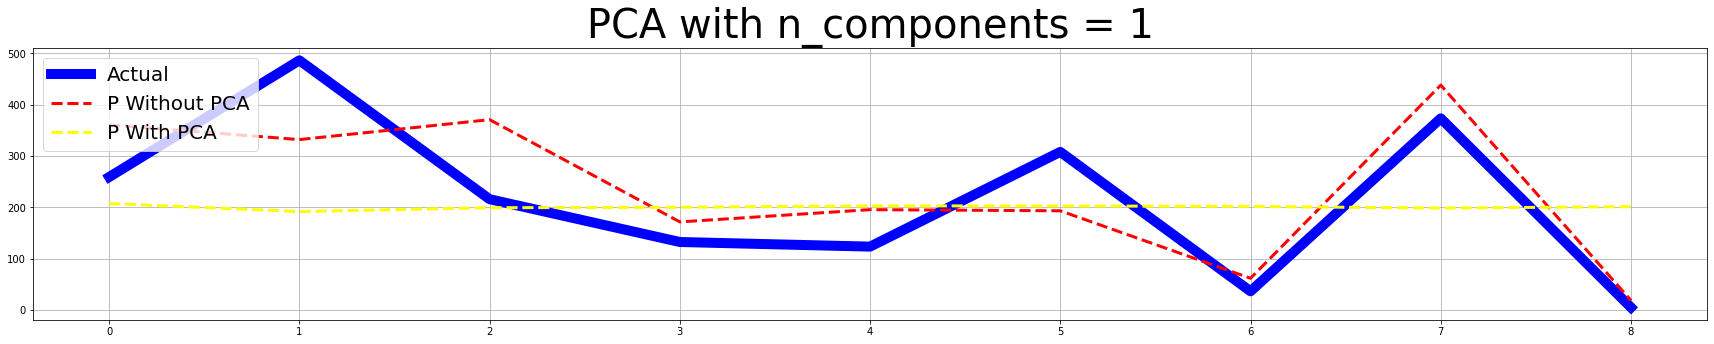

n_components = 1
Coefficients: 
 [-0.20444167]
Mean squared error: 23089.24
Coefficient of determination: -0.04
Score: -0.04
------------------------------------------------------


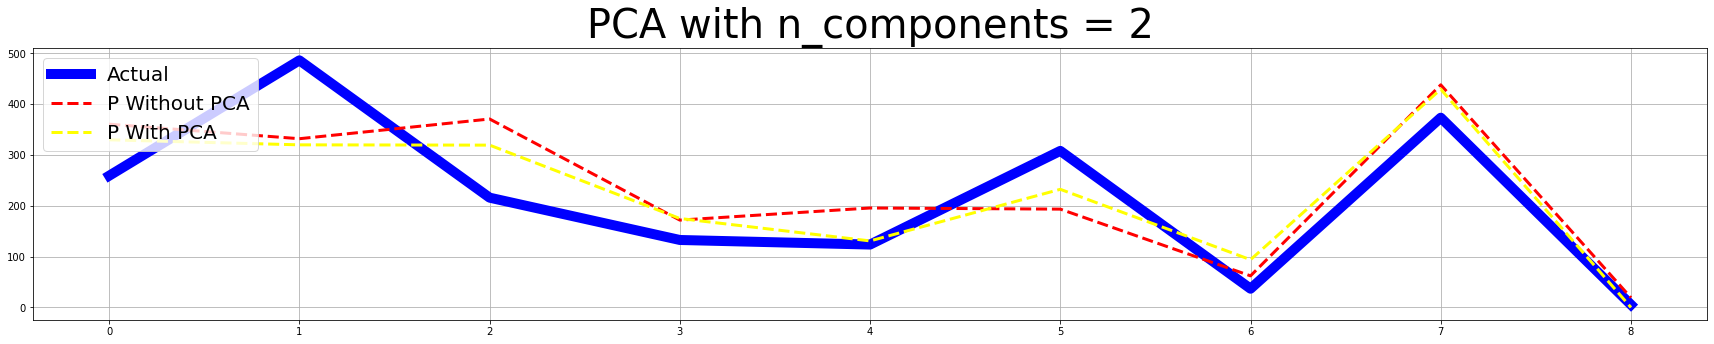

n_components = 2
Coefficients: 
 [  0.25440598 -32.78697761]
Mean squared error: 6372.45
Coefficient of determination: 0.71
Score: 0.71
------------------------------------------------------


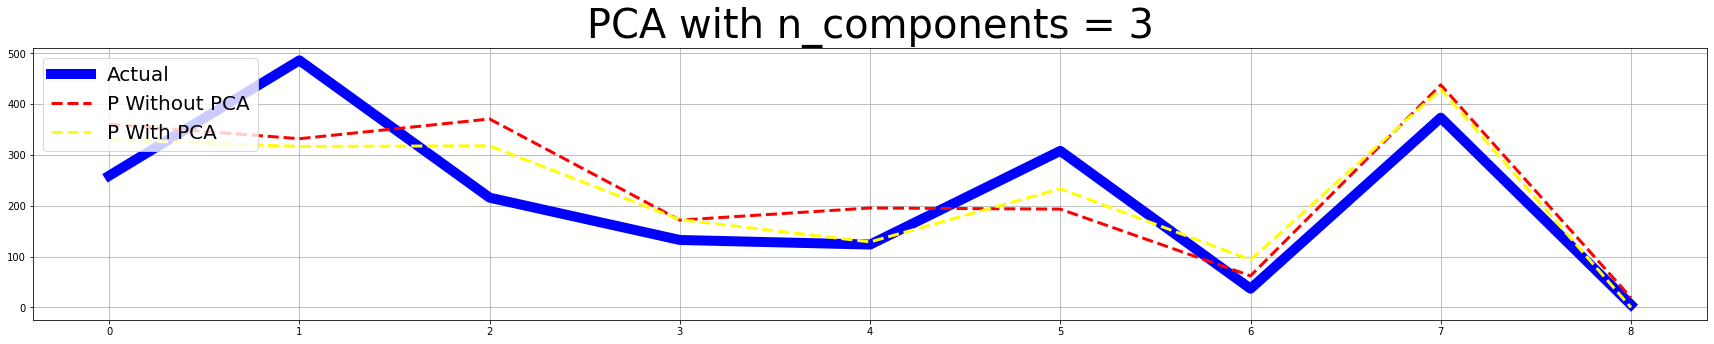

n_components = 3
Coefficients: 
 [  0.24097081 -32.79901086   1.63102377]
Mean squared error: 6417.26
Coefficient of determination: 0.71
Score: 0.71
------------------------------------------------------


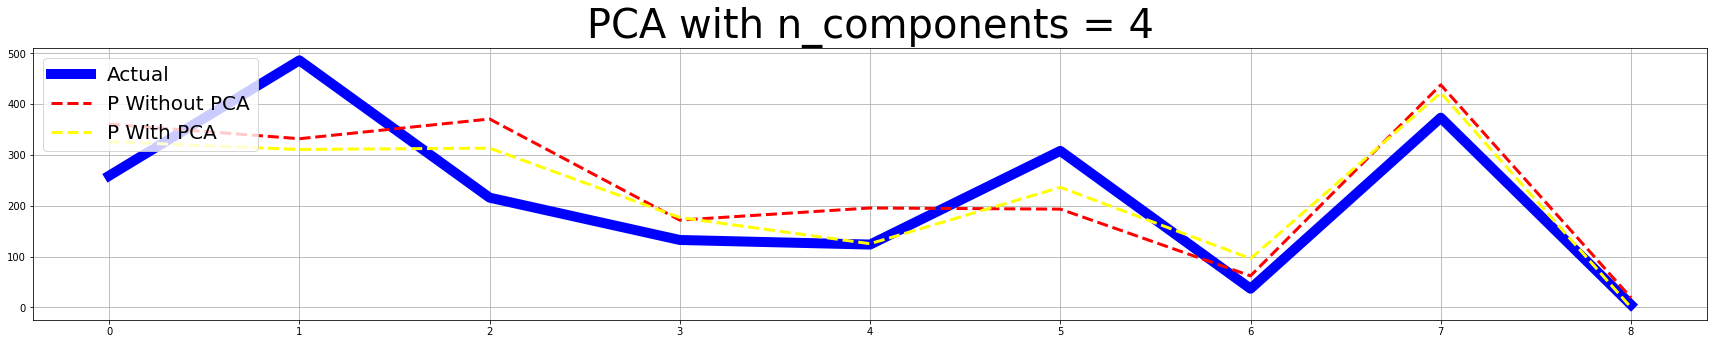

n_components = 4
Coefficients: 
 [  0.21943519 -32.61213842   2.00012002   5.50963023]
Mean squared error: 6423.14
Coefficient of determination: 0.71
Score: 0.71
------------------------------------------------------


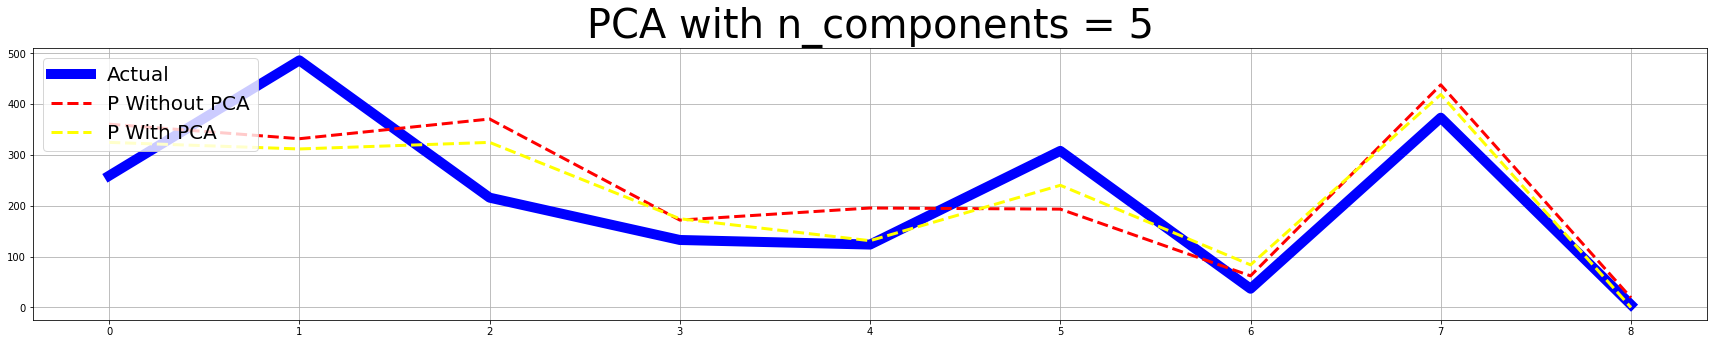

n_components = 5
Coefficients: 
 [  0.22452258 -32.71890316   1.64368639   4.28069287 -12.08355778]
Mean squared error: 6363.24
Coefficient of determination: 0.71
Score: 0.71
------------------------------------------------------


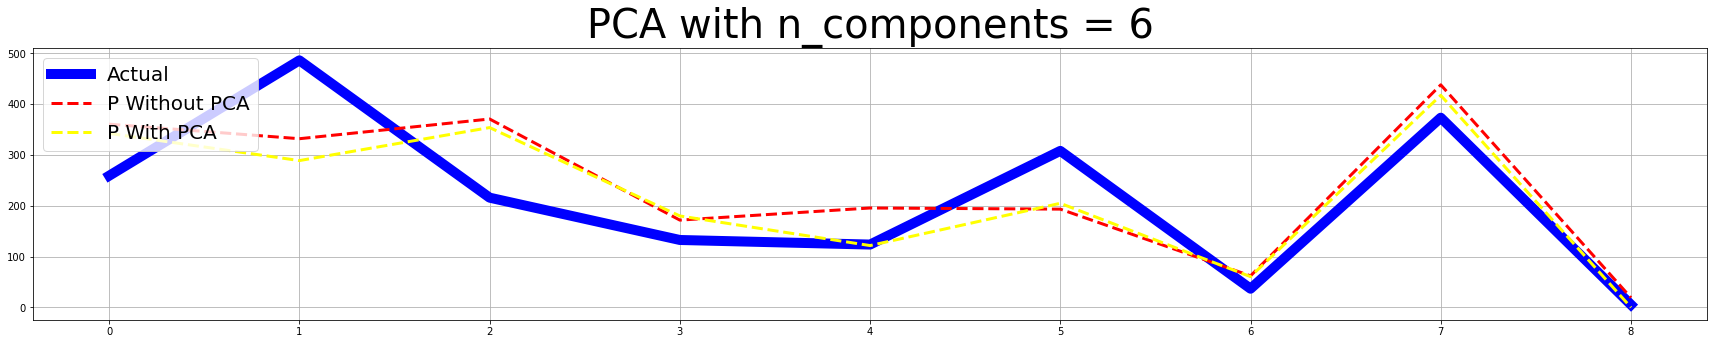

n_components = 6
Coefficients: 
 [  0.16233957 -32.91557364   0.60017589   1.55299666 -16.37558289
 -50.54979003]
Mean squared error: 8924.53
Coefficient of determination: 0.60
Score: 0.60
------------------------------------------------------


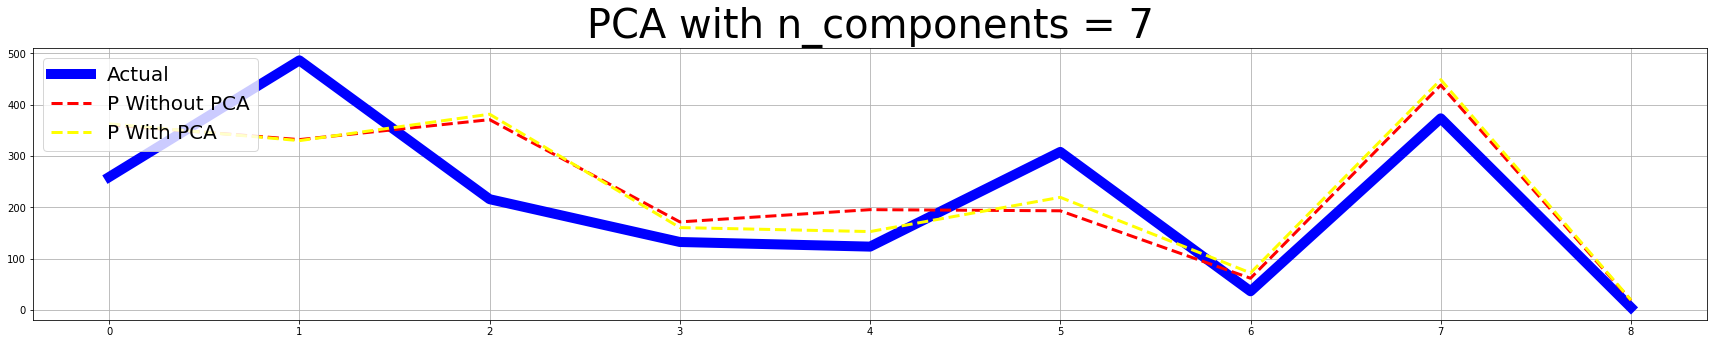

n_components = 7
Coefficients: 
 [  0.34574911 -33.34197495  -2.41612506  -7.9139366  -18.25032728
 -43.82806484 -86.54481946]
Mean squared error: 8794.36
Coefficient of determination: 0.60
Score: 0.60
------------------------------------------------------


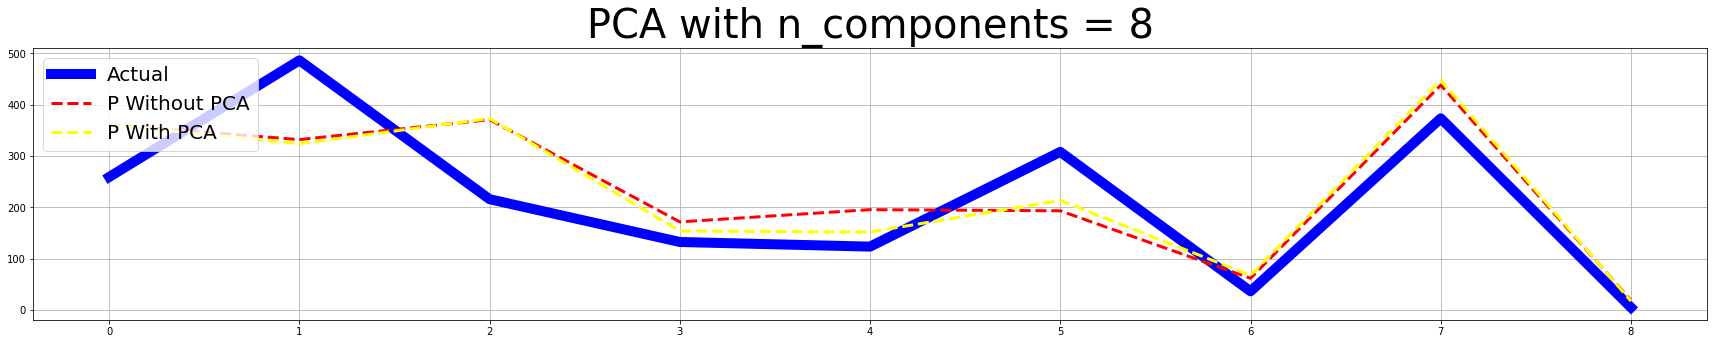

n_components = 8
Coefficients: 
 [  0.30886595 -33.31028206  -1.81382     -8.09436304 -17.73502647
 -44.41869846 -84.38131764  36.88345247]
Mean squared error: 8682.15
Coefficient of determination: 0.61
Score: 0.61
------------------------------------------------------


In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


for i in range(1, 9):
    pca = PCA(n_components=i)
    pca.fit_transform(X_scaled)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)

    for p in range(len(y_pred_pca)):
        if y_pred_pca[p] < 0:
            y_pred_pca[p] = 0

    # set size of figure
    plt.figure(figsize=(30, 5))
    plt.grid()
    # plot y_test as line and disable index
    plt.plot(y_test.values, color='blue', linewidth=10)
    plt.plot(y_pred, color='red', linewidth=3, linestyle='dashed')
    # plot y_pred as line and disable index
    plt.plot(y_pred_pca, color='yellow', linewidth=3, linestyle='dashed')
    plt.legend(['Actual','P Without PCA', 'P With PCA'], loc='upper left', fontsize=20)
    plt.title('PCA with n_components = ' + str(i), fontsize=40)
    plt.show()

    # which n_components is the best?
    
    # components relation with feature
    print('n_components = ' + str(i))
    print('Coefficients: \n', model.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
            % mean_squared_error(y_test_pca, y_pred_pca))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
            % r2_score(y_test_pca, y_pred_pca))
    print('Score: %.2f'
            % model.score(X_test_pca, y_test_pca))
#    
    print('------------------------------------------------------')
    
    
        

    
    
    